<a href="https://colab.research.google.com/github/Arafath3/PyTorch/blob/main/Classification_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with pyTorch

 Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

## 1. Data

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


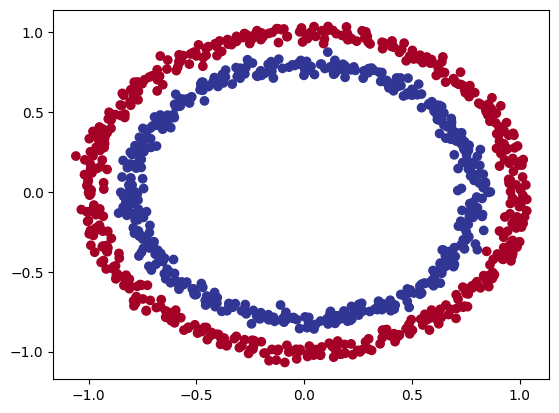

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a toy dataset that is small enough to experiment but still sizeable engough to practice the fundamentals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch
from torch import nn

In [10]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [12]:
# split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
len(X_train), len(X_test)

(800, 200)

In [14]:
type(X_train)

torch.Tensor

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:
1. setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model ( by subclassing `nn.Module`)
3. Define a loss function and torch.optimizer
4. Create a training and test loop

In [15]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
# 1. Construct a model that subclasses nn.Module

class CircleModeV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features=5) # takes in 2 features and upclass to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single features (same shape as y)

    self.two_linear_layers = nn.Sequential(
                                nn.Linear(in_features=2, out_features=5, bias=True),
                                nn.Linear(in_features=5, out_features=1, bias=True)
      ).to(device)
  # 3. Define a forward() method  that outlines as the forward pass
  def forward(self, x):
    # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    return self.two_linear_layers

# 4. Instatiate an instane of our model class and send it to the target device

model_0 = CircleModeV0().to(device)
model_0

CircleModeV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [17]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5, bias=True),
    nn.Linear(in_features=5, out_features=1, bias=True)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0276, -0.3296],
                      [-0.0027,  0.4885],
                      [ 0.0783, -0.6412],
                      [-0.5196,  0.6611],
                      [-0.4467, -0.0447]])),
             ('0.bias', tensor([-0.5573,  0.3807, -0.6795,  0.4753,  0.5621])),
             ('1.weight',
              tensor([[ 0.0672, -0.2989,  0.4052,  0.0692, -0.0022]])),
             ('1.bias', tensor([-0.3197]))])

In [19]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.9751],
        [-1.0814],
        [-0.5939],
        [-1.0836],
        [-0.4306],
        [-0.4967],
        [-0.9252],
        [-0.7878],
        [-0.6013],
        [-1.0867]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

for classification you might want binary cross entropy or categorical cross entropy (cross entropy).



In [20]:
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone throught the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [21]:
# Calculate Accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Loop

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking them

In [22]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
   y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.9751],
        [-1.0814],
        [-0.5939],
        [-1.0836],
        [-0.4306]])

In [23]:
# Use the sigmoid activation function on our logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.2739],
        [0.2533],
        [0.3558],
        [0.2528],
        [0.3940]])

For our predictions probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5 y=1 (class 1)
* `y_preds_probs` < 0.5, y=0 (class 2)

In [24]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)


# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


# Get rid of extra dimension
y_preds.squeeze()

tensor([0., 0., 0., 0., 0.])

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [26]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
   ## training
    model_0.train()

   # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. calculate loss and accuracy
    loss = loss_fn(y_logits,y_train) # nn.BCEWithLogitsLoss expects raw logits as input

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step()
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # 2, calculate test loss/acc
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.76318, Acc: 50.00 | Test loss: 0.74940, Test_acc: 50.00
Epoch: 10 | Loss: 0.71183, Acc: 50.00 | Test loss: 0.70490, Test_acc: 50.00
Epoch: 20 | Loss: 0.69912, Acc: 49.88 | Test loss: 0.69462, Test_acc: 48.50
Epoch: 30 | Loss: 0.69591, Acc: 45.88 | Test loss: 0.69246, Test_acc: 51.50
Epoch: 40 | Loss: 0.69502, Acc: 47.88 | Test loss: 0.69212, Test_acc: 52.50
Epoch: 50 | Loss: 0.69469, Acc: 48.75 | Test loss: 0.69215, Test_acc: 51.50
Epoch: 60 | Loss: 0.69452, Acc: 49.38 | Test loss: 0.69223, Test_acc: 51.00
Epoch: 70 | Loss: 0.69439, Acc: 49.62 | Test loss: 0.69230, Test_acc: 51.00
Epoch: 80 | Loss: 0.69428, Acc: 49.50 | Test loss: 0.69237, Test_acc: 51.50
Epoch: 90 | Loss: 0.69418, Acc: 49.75 | Test loss: 0.69242, Test_acc: 51.50
Epoch: 100 | Loss: 0.69410, Acc: 49.38 | Test loss: 0.69248, Test_acc: 51.00
Epoch: 110 | Loss: 0.69402, Acc: 49.38 | Test loss: 0.69253, Test_acc: 50.50
Epoch: 120 | Loss: 0.69394, Acc: 49.62 | Test loss: 0.69258, Test_acc: 50.50
Epoch: 130

## 4. Make predictions and evaluate the model

from the metrics it looks like our model isn't learning anything

so to inslect it let's make some predictions and make them visual

In [27]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_functions.py already exists, skipping download


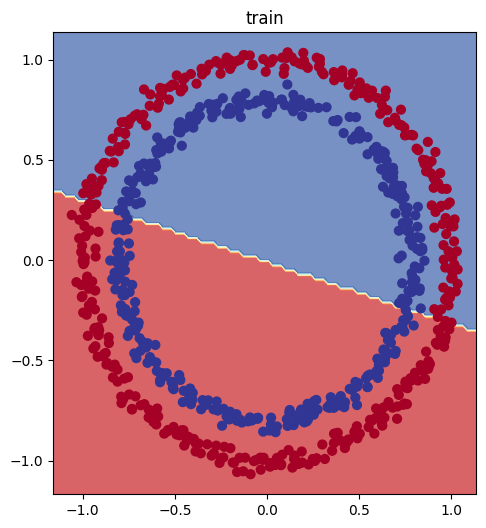

In [28]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)


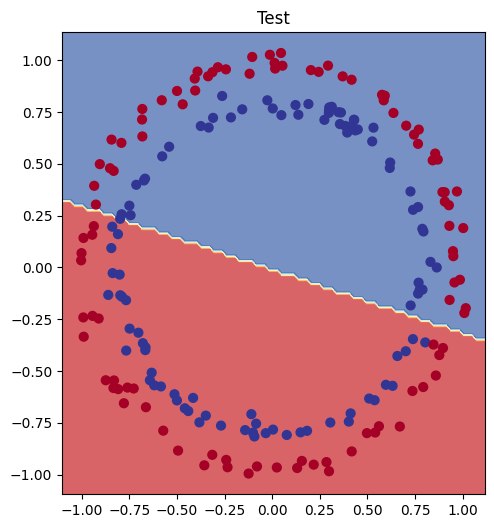

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_0, X_test,y_test)

## 5. Improving a model (from a model perspective)

* Add more layers- give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

ANd because thse options are all values we as machine learning engineers and data scientists can change, they are referred as **Hyperparameters**

In [30]:
class CircleModelV1(nn.Module):
  def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=1, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))



model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
# Creating loss function
loss_fn = nn.BCEWithLogitsLoss()


# Creating a optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [32]:
torch.manual_seed(42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
     test_logits = model_1(X_test).squeeze()
     test_pred = torch.round(torch.sigmoid(test_logits))
     test_loss = loss_fn(test_logits, test_pred)
     test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}%")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (800x2 and 1x10)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_1, X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot  to a larger problem is to test out a smaller problem.

In [ ]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [ ]:
X_train.shape, y_train.shape

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
loss_fn_2 = nn.L1Loss()

optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_1.train()

  y_preds = model_1(X_train)

  loss = loss_fn_2(y_preds, y_train)

  optimizer_1.zero_grad()

  loss.backward()

  optimizer_1.step()

  model_1.eval()
  with torch.inference_mode():
     test_preds = model_1(X_test)
     test_loss = loss_fn_2(test_preds, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

In [ ]:
model_1.state_dict()

In [ ]:
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

## 6. The missingg piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straingt and
 non-straight line?"

 Or in machine learning terms, infinite(but really it is finite) of linear and non-linear functions?


## 6.1 Recreating non-linear data

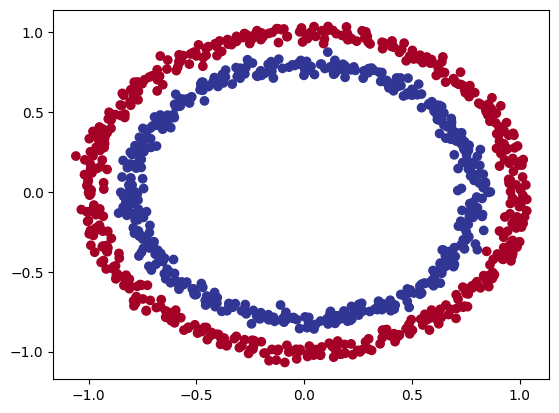

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.RdYlBu);

In [42]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2 ,random_state=42)

X_train[:5], X_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]))

## Building a model with non-linearity
  * Linear = straight line
  * Non-linear = not a straight line

In [43]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [44]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [51]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  if epoch % 100 == 0:
     print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.1065, Acc: 99.88% | Test loss: 0.1410, Test Acc: 99.50%
Epoch: 100 | Loss: 0.0772, Acc: 99.62% | Test loss: 0.1090, Test Acc: 99.50%
Epoch: 200 | Loss: 0.0588, Acc: 99.75% | Test loss: 0.0883, Test Acc: 99.50%
Epoch: 300 | Loss: 0.0466, Acc: 99.75% | Test loss: 0.0744, Test Acc: 99.50%
Epoch: 400 | Loss: 0.0380, Acc: 99.75% | Test loss: 0.0640, Test Acc: 99.50%
Epoch: 500 | Loss: 0.0318, Acc: 99.75% | Test loss: 0.0563, Test Acc: 99.50%
Epoch: 600 | Loss: 0.0273, Acc: 100.00% | Test loss: 0.0506, Test Acc: 99.50%
Epoch: 700 | Loss: 0.0239, Acc: 100.00% | Test loss: 0.0460, Test Acc: 99.50%
Epoch: 800 | Loss: 0.0212, Acc: 100.00% | Test loss: 0.0422, Test Acc: 99.50%
Epoch: 900 | Loss: 0.0190, Acc: 100.00% | Test loss: 0.0392, Test Acc: 99.00%


### 6.4 Evaluating a model trained with non-linear activation functions

In [52]:
# Makes predictions

model_2.eval()
with torch.inference_mode():
   y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

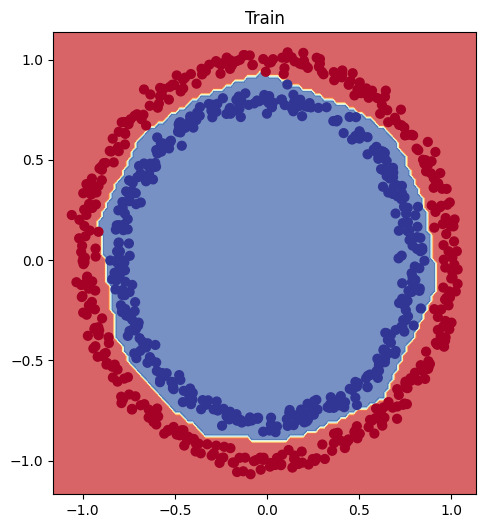

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

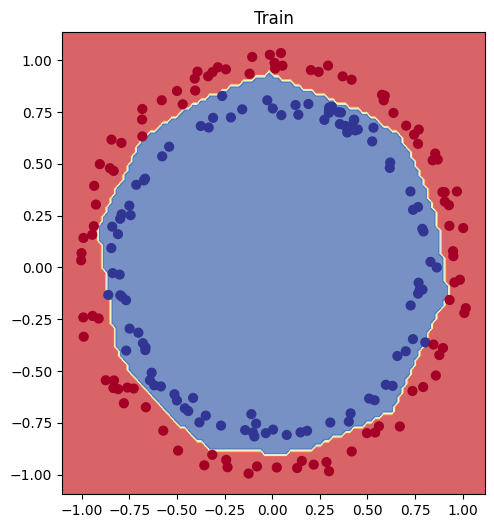

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterbs on its own.

And these tools are linear & non-linear functions.

In [55]:
# Create a tensor
A = torch.arange(-10, 10, 1.0)
A.dtype

torch.float32

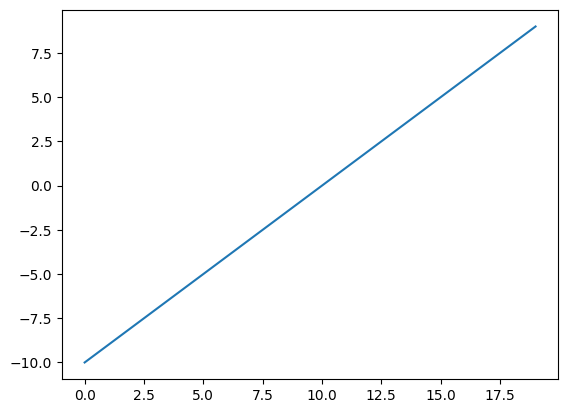

In [56]:
plt.plot(A);

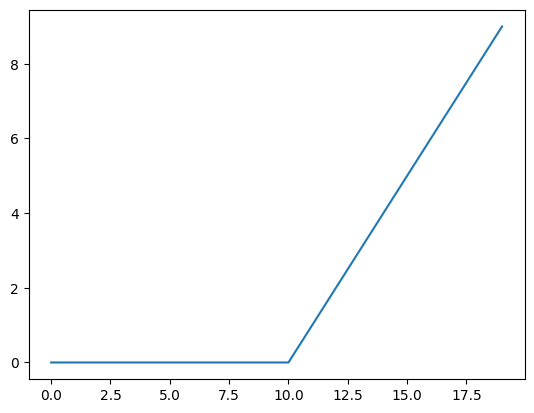

In [59]:
plt.plot(torch.relu(A));

In [60]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # input must be tensor


relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

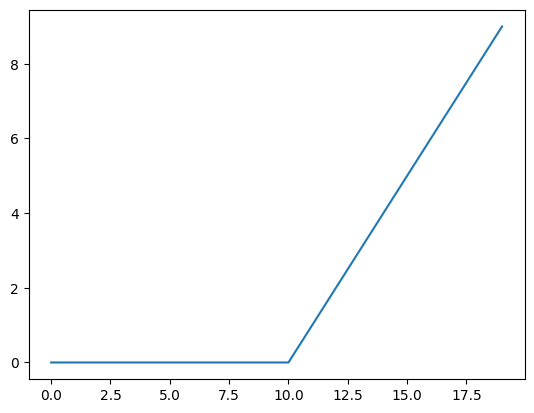

In [62]:
plt.plot(relu(A));

In [63]:
# Sigmoid

def sigmoid(x):
  return 1/ (1 + torch.exp(-x))

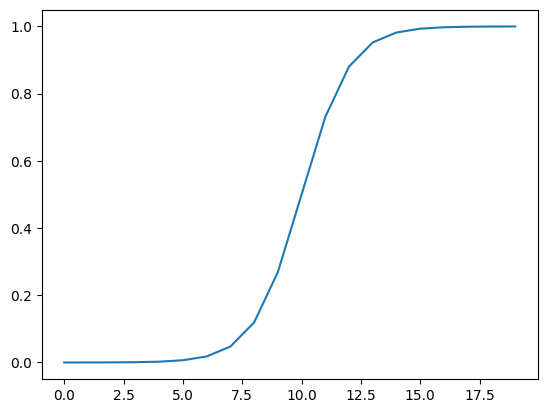

In [64]:
plt.plot(torch.sigmoid(A));

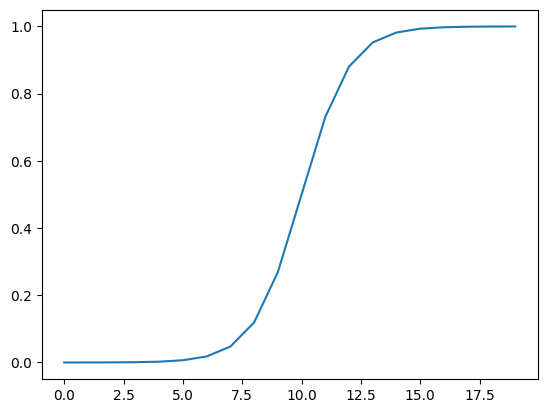

In [65]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class classification dataset

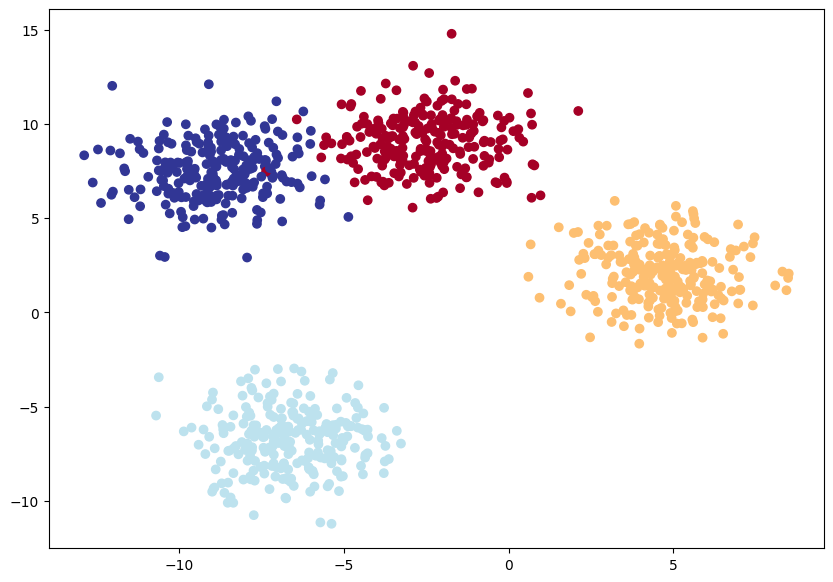

In [176]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES,centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=.2, random_state=42)

# 4. Plot the data

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Buidling a multi-class classification model

In [177]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [178]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.


    Args:
       input_features (int): Number of input features to the model
       output_features (int): Number of outputs features (number of output classes)
       hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


# Create an instancee of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [179]:
X_blob_train.shape

torch.Size([800, 2])

In [180]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer for a multi-class classification model

In [181]:
# Creating loss function

loss_fn = nn.CrossEntropyLoss()


# Create a optimizer

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### 8.4 Getting predictions probabilities for a multi-class

In [182]:
model_4.eval()

with torch.inference_mode():
   y_logits = model_4(X_blob_train)
   y_preds_prob = torch.softmax(y_logits, dim=1)

y_logits[:10], y_preds_prob

(tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
         [-0.2398, -1.2335, -0.9858, -0.2899],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [ 0.2391, -0.2472,  0.1494,  0.0213],
         [-0.1214, -0.9804, -0.6918, -0.1923],
         [-0.2044, -1.1380, -0.9468, -0.3093],
         [-0.2613, -1.2852, -1.0251, -0.2935],
         [-0.5237, -0.5791, -1.1276, -0.8689],
         [-0.0423, -0.8228, -0.4666, -0.0986],
         [-0.1876, -1.1245, -0.8498, -0.2406]]),
 tensor([[0.3080, 0.3328, 0.1441, 0.2150],
         [0.3577, 0.1324, 0.1696, 0.3402],
         [0.3011, 0.1843, 0.2823, 0.2323],
         ...,
         [0.3613, 0.1317, 0.1656, 0.3414],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3272, 0.1482, 0.2129, 0.3117]]))

In [183]:
torch.sum(y_preds_prob[0])

tensor(1.)

In [184]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_preds_prob, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [185]:
torch.argmax(y_preds_prob)

tensor(2721)

In [186]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## 8.5 Creating a training loop and testing loop for a multi-class

In [187]:
torch.manual_seed(42)
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss:{loss:.4f}, Acc: {acc:.2f}% | Test_loss: {test_loss:.4f}, Test_Acc: {test_acc:.2f}%")

Epoch: 0 | loss:1.1588, Acc: 40.38% | Test_loss: 1.0755, Test_Acc: 48.00%
Epoch: 10 | loss:0.6448, Acc: 96.75% | Test_loss: 0.6607, Test_Acc: 97.50%
Epoch: 20 | loss:0.4254, Acc: 98.50% | Test_loss: 0.4307, Test_Acc: 100.00%
Epoch: 30 | loss:0.2529, Acc: 99.12% | Test_loss: 0.2451, Test_Acc: 99.50%
Epoch: 40 | loss:0.1123, Acc: 99.25% | Test_loss: 0.1023, Test_Acc: 99.50%
Epoch: 50 | loss:0.0663, Acc: 99.25% | Test_loss: 0.0585, Test_Acc: 99.50%
Epoch: 60 | loss:0.0507, Acc: 99.25% | Test_loss: 0.0429, Test_Acc: 99.50%
Epoch: 70 | loss:0.0430, Acc: 99.25% | Test_loss: 0.0349, Test_Acc: 99.50%
Epoch: 80 | loss:0.0384, Acc: 99.25% | Test_loss: 0.0299, Test_Acc: 99.50%
Epoch: 90 | loss:0.0352, Acc: 99.25% | Test_loss: 0.0266, Test_Acc: 99.50%


### 8.6 Making and evaluating

In [188]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [190]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

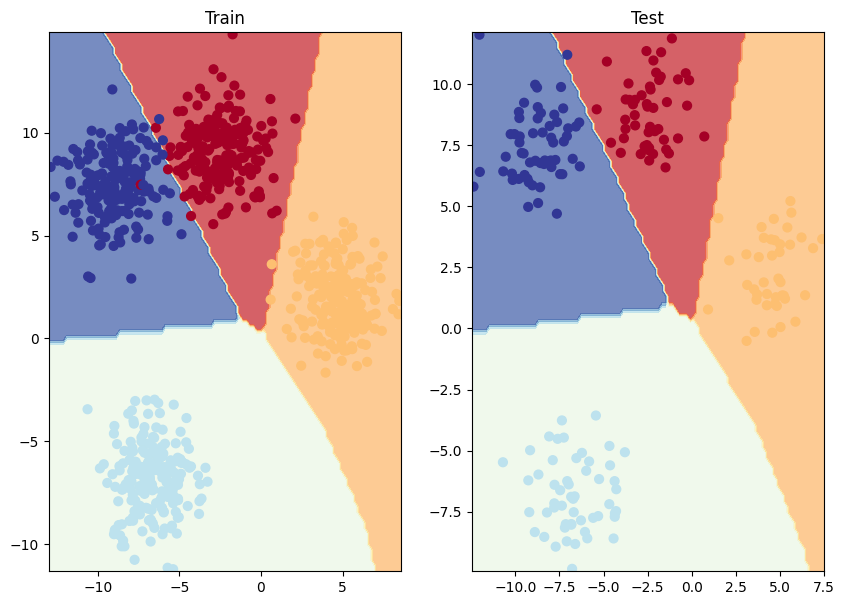

In [191]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples  how many does our model got right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [192]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [196]:
from torchmetrics import Accuracy

# Setup metric

torchmetrics_accuaracy = Accuracy().to(device)


# Calculate accuracy
torchmetrics_accuaracy(y_pred, y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'